In [5]:
from HestonFunctions import Heston_explicit_bf, HestonCallClosedForm, PIntegrand, P 
import numpy as np

In [11]:
U_space = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   

In [14]:
#print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

import matplotlib.pyplot as plt

# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 41)
v0_range = np.linspace(0, 1, 21)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)

# Initialize the HestonPrice matrix
HestonPrice = np.zeros((len(v0_range), len(S0_range)))

# Calculate the HestonPrice matrix
for i in range(len(v0_range)):
    for j in range(len(S0_range)):
        if S0_range[j] == 0:
            HestonPrice[i][j] = 0
        else:
            HestonPrice[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)




In [16]:
print(U_space.T.shape)
print(HestonPrice.shape)

(21, 41)
(21, 41)


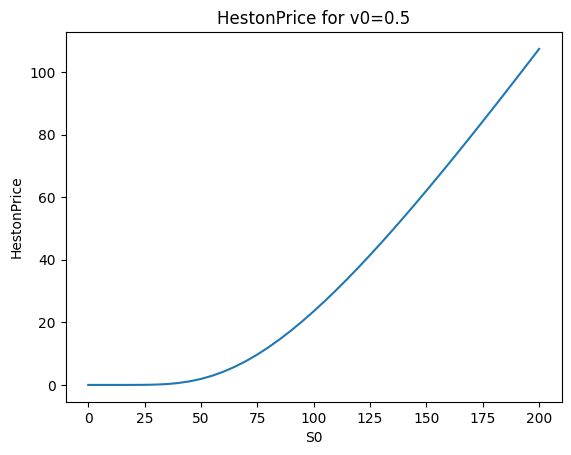

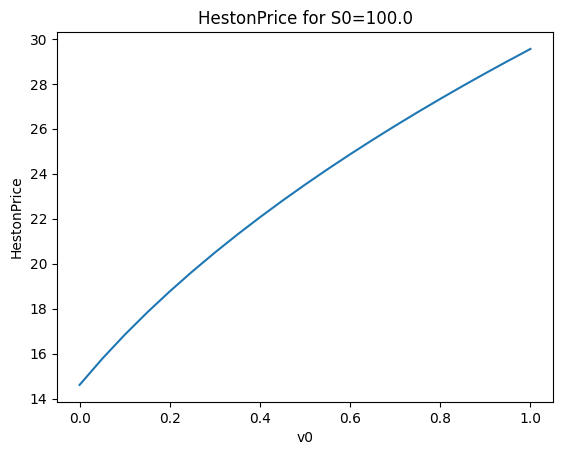

In [17]:
# Fix the value of v0 and plot the line for different values of S0
v0_index = 10
plt.plot(S0_range, HestonPrice[v0_index, :])
plt.xlabel('S0')
plt.ylabel('HestonPrice')
plt.title(f'HestonPrice for v0={v0_range[v0_index]}')
plt.show()

# Fix the value of S0 and plot the line for different values of v0
S0_index = 20
plt.plot(v0_range, HestonPrice[:, S0_index])
plt.xlabel('v0')
plt.ylabel('HestonPrice')
plt.title(f'HestonPrice for S0={S0_range[S0_index]}')
plt.show()


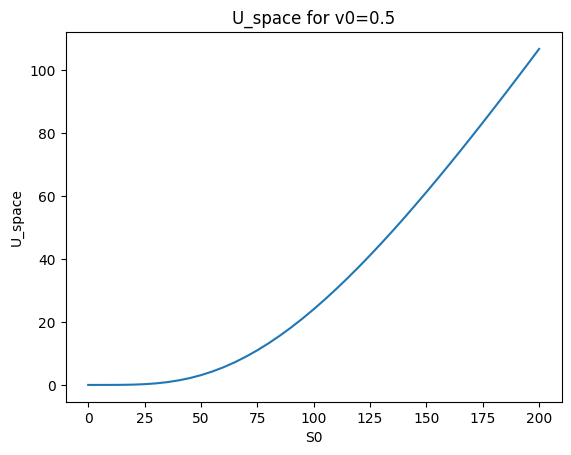

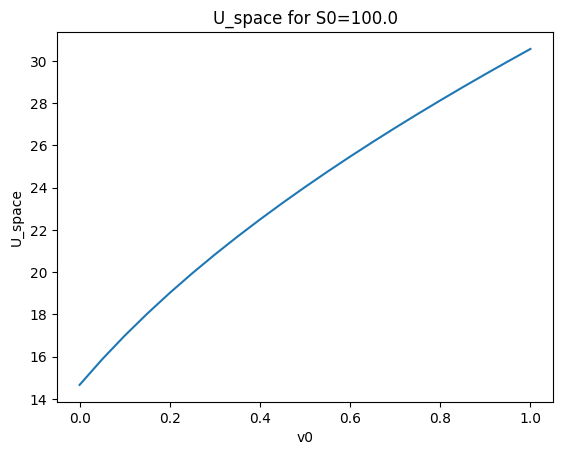

In [19]:
# Fix the value of v0 and plot the line for different values of S0
v0_index = 10
plt.plot(S0_range, U_space.T[v0_index, :])
plt.xlabel('S0')
plt.ylabel('U_space')
plt.title(f'U_space for v0={v0_range[v0_index]}')
plt.show()

# Fix the value of S0 and plot the line for different values of v0
S0_index = 20
plt.plot(v0_range, U_space.T[:, S0_index])
plt.xlabel('v0')
plt.ylabel('U_space')
plt.title(f'U_space for S0={S0_range[S0_index]}')
plt.show()


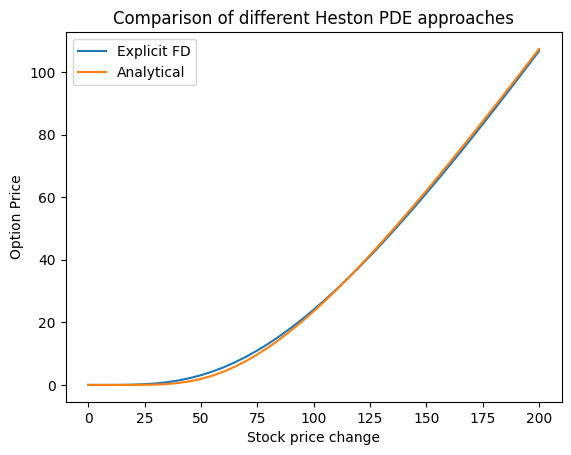

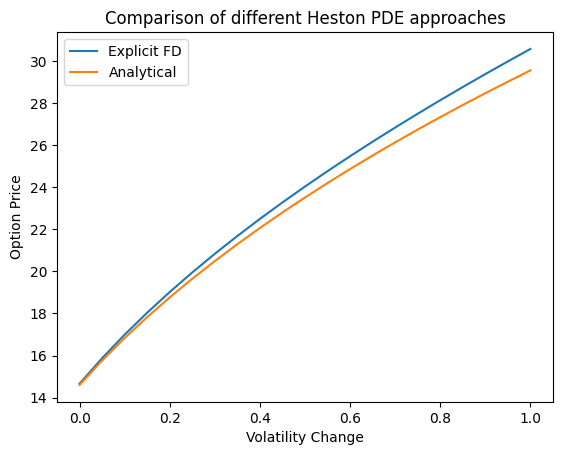

In [25]:
# Fix the value of v0 and plot the line for different values of S0
v0_index = 10
plt.plot(S0_range, U_space.T[v0_index, :], label='Explicit FD')
plt.plot(S0_range, HestonPrice[v0_index, :], label='Analytical')
plt.xlabel('Stock price change')
plt.ylabel('Option Price')
plt.title(f'Comparison of different Heston PDE approaches')
plt.legend()
plt.show()

# Fix the value of S0 and plot the line for different values of v0
S0_index = 20
plt.plot(v0_range, U_space.T[:, S0_index], label='Explicit FD')
plt.plot(v0_range, HestonPrice[:, S0_index], label='Analytical')
plt.xlabel('Volatility Change')
plt.ylabel('Option Price')
plt.title(f'Comparison of different Heston PDE approaches')
plt.legend()
plt.show()
